# Generate seg and flow images

Same code as TimeLapseData2d

In [1]:
%%capture

import time
import copy
import numpy as np
from skimage.filters import gaussian
import cv2

from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import pylab as pl

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

from tifffile import imread, imsave
import _pickle as pickle

%reload_ext autoreload
%autoreload 2

from netsurface2d import NetSurf2d
from netsurface2dt import NetSurf2dt
from data3d import Data3d

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon



In [2]:
#filename = '/Users/micha/Desktop/Uni und so/CBG HiWi/Downloads/MAX_LP320-06-08_Concat-51-100.tif'
filename = '/Users/micha/Desktop/Uni und so/CBG HiWi/Membrane Localization/Cell_Model-0.0.1-3D_Sim-PSF(0.2 0.2 0.6) PXS(0.1 0.1 0.1).tif'


stack = imread(filename)

print(stack.shape)
print(stack)

segchannel = stack
#segchannel = stack[:,0,:,:]
sigma = [0.,2.,2.]
segchannel_smooth = gaussian(segchannel,sigma)

(50, 134, 162)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [3]:
segchannel.shape

(50, 134, 162)

In [4]:
print(segchannel[0].shape[1])

162


In [34]:
max_rs = (segchannel[0].shape[1] /2 +20,
          segchannel[0].shape[1] / 2 +20)

min_rs = (1,1)


data = Data3d( segchannel_smooth, pixelsize=(1.,1.), silent=False )
data.set_seg_params(num_columns=72,K=100,max_delta_k=8)
objects = []

In [35]:
cell = data.init_object("cell 1")
objects.append(cell)

data.add_object_at( cell, min_rs, max_rs, frame=9, seed=(62,81), segment_it=True )

data.track(cell, seed_frame=9, target_frames=range(10,38), recenter_iterations=1)

Added appearance for "cell 1" in frame 9 with seed coordinates [62. 81.]
      Optimum energy:  0.05817395887526942
      Nodes in/out:  4255 2945
      Area:  11354.0
Added appearance for "cell 1" in frame 10 with seed coordinates [62. 81.]
      Optimum energy:  0.08698384410879799
      Nodes in/out:  4272 2928
      Area:  11440.0
    Updated center to [66.09722222 73.55555556]
Added appearance for "cell 1" in frame 11 with seed coordinates [66. 74.]
      Optimum energy:  0.12822955351957682
      Nodes in/out:  4359 2841
      Area:  11574.999999999996
    Updated center to [68.59722222 70.33333333]
Added appearance for "cell 1" in frame 12 with seed coordinates [69. 70.]
      Optimum energy:  0.16107230541595932
      Nodes in/out:  4393 2807
      Area:  11641.000000000004
    Updated center to [70.125      68.59722222]
Added appearance for "cell 1" in frame 13 with seed coordinates [70. 69.]
      Optimum energy:  0.16981055631370012
      Nodes in/out:  4405 2795
      Area:

In [36]:
#data.segment2dt( cell, max_radial_delta=10 );

In [37]:
segimgs = data.create_segmentation_image()

works 0
out:ID ['cell 1']
in:ID ['cell 1']
NoneType 0
works 1
out:ID ['cell 1']
in:ID ['cell 1']
NoneType 1
works 2
out:ID ['cell 1']
in:ID ['cell 1']
NoneType 2
works 3
out:ID ['cell 1']
in:ID ['cell 1']
NoneType 3
works 4
out:ID ['cell 1']
in:ID ['cell 1']
NoneType 4
works 5
out:ID ['cell 1']
in:ID ['cell 1']
NoneType 5
works 6
out:ID ['cell 1']
in:ID ['cell 1']
NoneType 6
works 7
out:ID ['cell 1']
in:ID ['cell 1']
NoneType 7
works 8
out:ID ['cell 1']
in:ID ['cell 1']
NoneType 8
works 9
out:ID ['cell 1']
in:ID ['cell 1']
Type 9
works 10
out:ID ['cell 1']
in:ID ['cell 1']
Type 10
works 11
out:ID ['cell 1']
in:ID ['cell 1']
Type 11
works 12
out:ID ['cell 1']
in:ID ['cell 1']
Type 12
works 13
out:ID ['cell 1']
in:ID ['cell 1']
Type 13
works 14
out:ID ['cell 1']
in:ID ['cell 1']
Type 14
works 15
out:ID ['cell 1']
in:ID ['cell 1']
Type 15
works 16
out:ID ['cell 1']
in:ID ['cell 1']
Type 16
works 17
out:ID ['cell 1']
in:ID ['cell 1']
Type 17
works 18
out:ID ['cell 1']
in:ID ['cell 1']
Type

# Display segmented boundary

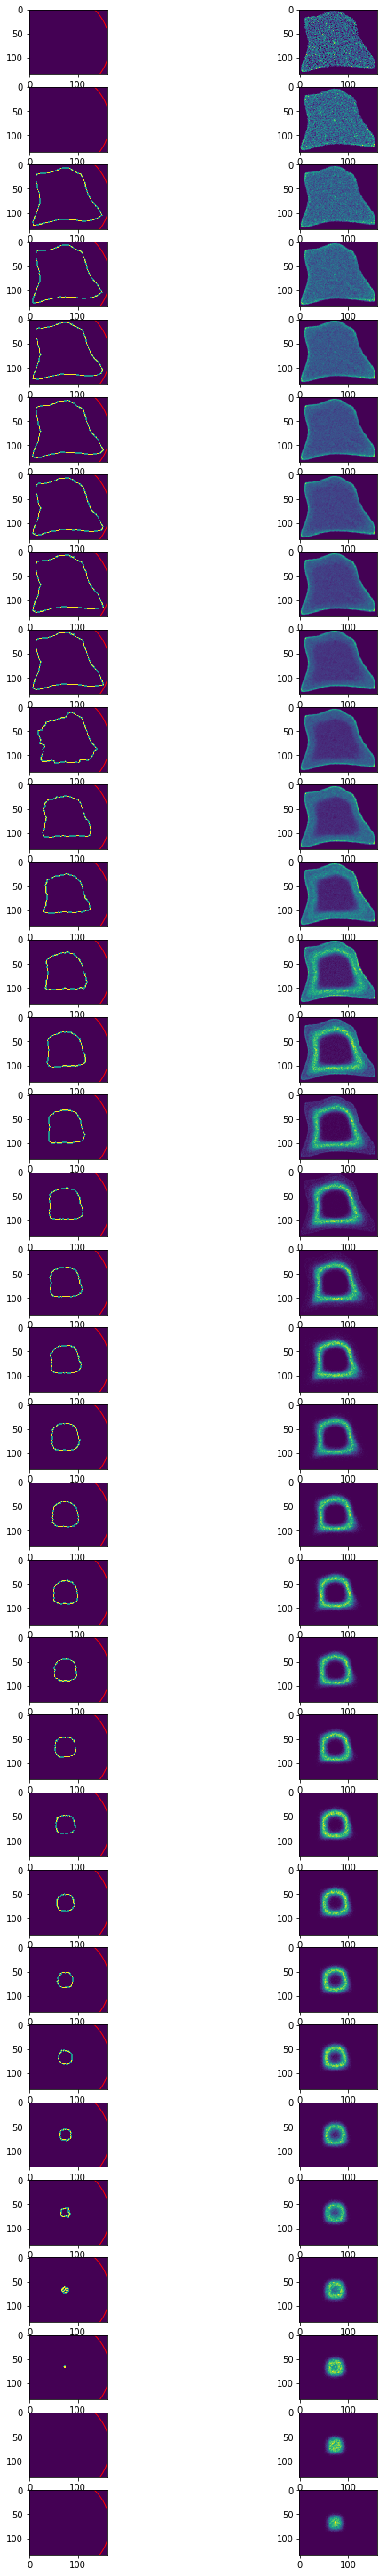

In [38]:
#pylab.rcParams['figure.figsize'] = (4, 5)
fig=plt.figure(figsize(10,80))
k=0
frame_start=7
frame_end=40
loop=range(frame_start,frame_end)
for i in loop:
    ax=fig.add_subplot(50,2,frame_start+k*2)
    #plt.subplots_adjust(hspace = 1,wspace=1)
    #pyplot.plot(segchannel[i])
    ax.imshow(segimgs[i])
    circle1 = plt.Circle((65, 73), 101 , color='r', fill=False)
    ax.add_artist(circle1)
    #ax.imshow(segchannel[i])
    ax.plot()
    ax=fig.add_subplot(50,2,frame_start+1+k*2)
    ax.imshow(segchannel[i-2])
    ax.plot
    k+=1

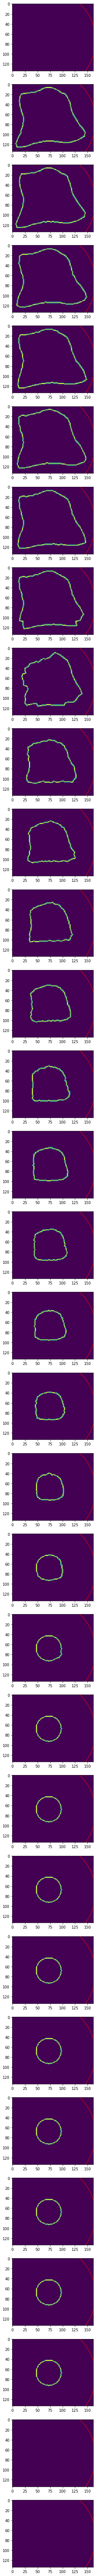

In [33]:
#pylab.rcParams['figure.figsize'] = (4, 5)
fig=plt.figure(figsize(200,200))
k=0
frame_start=8
frame_end=40
loop=range(frame_start,frame_end)
for i in loop:
    ax=fig.add_subplot(50,1,i)
    #plt.subplots_adjust(hspace = 1,wspace=1)
    #pyplot.plot(segchannel[i])
    ax.imshow(segimgs[i])
    circle1 = plt.Circle((65, 73), 101 , color='r', fill=False)
    ax.add_artist(circle1)
    #ax.imshow(segchannel[i])
    ax.plot()
    #ax=fig.add_subplot(50,2,frame_start)
    #ax.imshow(segchannel[i-2])
    #ax.plot
    k+=1

In [ ]:
data.compute_flow( flowchannel );

seg = segimgs
flow = np.swapaxes(np.swapaxes(data.flows,1,3),2,3)

# Dispalying Flow in X and Y for first frame 

In [ ]:
flow_x = np.swapaxes(flow,0,1)[0]
flow_y = np.swapaxes(flow,0,1)[1]

pylab.rcParams['figure.figsize'] = (6, 4)
fig = plt.figure()
fig.suptitle('flows in X and Y', fontsize=16)
ax = fig.add_subplot(121)
ax.imshow(flow_x[1], plt.get_cmap('gray'))
ax = fig.add_subplot(122)
ax.imshow(flow_y[1], plt.get_cmap('gray'))

## Getting boolean array of interior points

In [ ]:
def compute_cell_interior(fid, oid=0):
    in_points = []
    polygon = Polygon(data.get_result_polygone_2dt(oid, fid))
    size_x, size_y = shape(flow_x[0])[0], shape(flow_x[0])[1]
    flag = numpy.full((size_x, size_y), False, dtype=bool)

    for i in range(size_x):
        for j in range(size_y):
            point = Point(j,i)
            flag[i][j] = polygon.contains(point)
            if flag[i][j]:
                in_points.append((j,i))
    return in_points, flag

## Generate Random points and recording their trajectories

In [ ]:
def plot_start_end(fig, points):
    ax=fig.add_subplot(1,1,1)
    st_en = []
    ax.imshow(flag, plt.get_cmap('gray'))

    st_en.append((points[0][0], points[0][1]))
    st_en.append((points[-1][0], points[-1][1]))
                
    ax.scatter(points[0][0], points[0][1])
    ax.scatter(points[-1][0], points[-1][1], c='r', s= 40, marker= 'o' )
    
    ax.plot(*zip(*st_en))


In [ ]:
def plot_trajectory(fig, points, color='#00FF00'):
    ax=fig.add_subplot(1,1,1)
    segment = []
    ax.imshow(flag, plt.get_cmap('gray'))

    for i in range(len(points)-1):
        segment.append((points[i][0], points[i][1]))
        segment.append((points[i+1][0], points[i+1][1]))
                
        if i==0:
            ax.scatter(points[i][0], points[i][1], color=color, s=20, marker= 'o')
        #ax.scatter(points[i+1][0], points[i+1][1], color=color, s=10, marker= 'x' )
        if i==len(points)-2:
            ax.scatter(points[i+1][0], points[i+1][1], c='r', s=40, marker= 'o' )
    
        ax.plot(*zip(*segment), color=color, linewidth=.5)


In [ ]:
def compute_trajectories(flow_x, flow_y, rand_p, epochs=100):
    traj  = []
    for k in range(len(rand_p)):
        pos_x = in_points[rand_p[k]][1]
        pos_y = in_points[rand_p[k]][0]
        int_x = int(round(pos_x))
        int_y = int(round(pos_y))
        epoch = 0
        temp = []
        while flag[int_x][int_y] and epoch<epochs:
            int_x = int(round(pos_x))
            int_y = int(round(pos_y))
            temp.append( ( int_y, int_x ) )
            pos_x += flow_x[int_x][int_y]
            pos_y -= flow_y[int_x][int_y]
            epoch=epoch+1
        traj.append(temp)
        plot_trajectory(fig, temp, color=col)
    return traj

frame = 45
in_points, flag = compute_cell_interior(frame)
np.random.seed(79)
rand_p = np.random.randint(0,len(in_points),20)
traj = compute_trajectories(flow_x[frame], flow_y[frame], rand_p, epochs=250)

In [ ]:
pylab.rcParams['figure.figsize'] = (10, 16)
fig=plt.figure()

colors=["#FF00FF", "#00FF00", "#FF0066", "#00FF66"]

for i in range(len(traj)):
    col = colors[i%len(colors)]
    plot_trajectory(fig, traj[i][:], color=col)

Checking whether interior points are correctly captured

In [ ]:

pylab.rcParams['figure.figsize'] = (10, 8)
fig=plt.figure()
ax=fig.add_subplot(1,2,1)
ax.imshow(flag, plt.get_cmap('gray'))

ax=fig.add_subplot(1,2,2)
ax.imshow(flag, plt.get_cmap('gray'))
ax.scatter(*zip(*in_points))

## Plotting start and end points of trajectory of random points

start => blue in color 
end => red in color

In [ ]:
pylab.rcParams['figure.figsize'] = (40, 80)
fig=plt.figure()
for k in range(len(rand_p)):
   
    ax=fig.add_subplot(5,4,k+1)
    st_en = []
    ax.imshow(flag, plt.get_cmap('gray'))
    temp = traj[k]
    # put a blue dot at (10, 20)
    st_en.append((temp[0][0], temp[0][1]))
    st_en.append((temp[-1][0], temp[-1][1]))
                
    ax.scatter(temp[0][0], temp[0][1])
    
    # put a red dot, size 40, at len(temp) locations:
    #plt.scatter(*zip(*temp), c='r', s=40)
    
    ax.scatter(temp[-1][0], temp[-1][1], c='r', s= 40, marker= 'o' )
    
    ax.plot(*zip(*st_en))
    #ax.plt.show()
